<a href="https://colab.research.google.com/github/nicolenair/capstone/blob/master/Distance_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
   import os
!pip install --upgrade gensim

import nltk
nltk.download('punkt')

def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

     |████████████████████████████████| 24.2MB 1.4MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
openjdk version "11.0.6" 2020-01-14
OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)


In [0]:
# !wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
# !unzip mallet-2.0.8.zip

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
# os.chdir("/content/gdrive/My Drive/Colab Notebooks/CAPSTONE")
direc = "/content/gdrive/My Drive/Colab Notebooks/CAPSTONE/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#!pip install import_ipynb
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import os
import re
import os
import importlib
import nltk
import matplotlib.pyplot as plt
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [0]:
#listing possible names for same character
#to be used throughout
anne_names = ["Anne Shirley", "Anne", "Anne Blythe", "Mrs. Blythe", "Miss Blythe", "Mrs Blythe", "Anne dearie"]
diana_names = ["Diana Barry", "Diana"]
cornelia_names = ["Ms Cornelia", "Miss Cornelia", "Cornelia", "Cornelia Bryant", "Mrs Elliot", "Mrs. Elliot"]
jem_names = ["Jem Blythe", "Jem"]
davy_names = ["Davy", "Davy Keith"]

In [0]:
# importlib.reload(anno_auto)

In [0]:
# import os
# os.listdir("/content/gdrive/My Drive/Nicole-Internship-Complete-Folder/chatbot - all/chatbot-flask/GoogleNews-vectors-negative300.bin.gz")

In [0]:
#pasting all utterances into lists
property_ = "speaking"
file1 = open(direc+"gables_{}_list.txt".format(property_), "r")
file2 = open(direc+"avonlea_{}_list.txt".format(property_), "r")
file3 = open(direc+"island_{}_list.txt".format(property_), "r")
file4 = open(direc+"poplars_{}_list.txt".format(property_), "r")
file5 = open(direc+"dreams_{}_list.txt".format(property_), "r")
file6 = open(direc+"ingleside_{}_list.txt".format(property_), "r")
file7 = open(direc+"rainbow_{}_list.txt".format(property_), "r")
file8 = open(direc+"rilla_{}_list.txt".format(property_), "r")
sentence_gables = []
sentence_dreams = []
sentence_island = []
sentence_avonlea = []
sentence_poplars = []
sentence_ingleside = []
sentence_rainbow = []
sentence_rilla = []
target_gables = []
target_dreams = []
target_island = []
target_avonlea = [] ###
target_poplars = []
target_ingleside = []
target_rainbow = []
target_rilla = [] ###

file1_lines =file1.readlines()
file2_lines = file2.readlines()
file3_lines = file3.readlines()
file4_lines = file4.readlines()
file5_lines = file5.readlines()
file6_lines = file6.readlines()
file7_lines = file7.readlines()
file8_lines = file8.readlines()

files = [file1_lines, file2_lines, file3_lines ,file4_lines, file5_lines, file6_lines, file7_lines, file8_lines]
sentences = [sentence_gables, sentence_avonlea, sentence_island, sentence_poplars, sentence_dreams, sentence_ingleside, sentence_rainbow, sentence_rilla]
targets_pre = [target_gables, target_avonlea, target_island, target_poplars, target_dreams, target_ingleside, target_rainbow, target_rilla]

#we have saved it in line by line formats in the file, so we need to extract it here
for s in range(len(sentences)):
  for i in range(len(files[s])):
    if i%2==0:
      sentences[s].append([files[s][i]])
    else:
      targets_pre[s].append(files[s][i])
  # file.close()

In [0]:
#labeling book & character
from gensim.utils import simple_preprocess
book_character_labels = []
#contains tuples of character and book labels

for i in range(len(targets_pre)):
  for e in targets_pre[i]:
    in_labs = False
    for n in e.split(",")[1::2]:
      if (n, i) in book_character_labels:
        in_labs = n
    if in_labs==False:
      character_name_lengths = np.array([len(n) for n in e.split(",")[1::2]])
      book_character_labels.append((i, e.split(",")[np.argmax(character_name_lengths)*2+1]))
    else:
      book_character_labels.append((i, in_labs))

# book_character_labels = [(character_labels[e], book_labels[e]) for e in range(len(character_labels))]

sentences_flattened = []
for i in sentences:
  for e in i:
    sentences_flattened.append(simple_preprocess(e[0]))
    #after we have labelled the sentences, there is no longer a need to 
    #keep them in book lists, we keep it simply as a full list of utterances

In [0]:
def find_vector_for_character(characters_as_vectors, names, book = 0):
  anne_vectors_lda = []
  total_weighting = 0
  for i in range(len(character_documents.keys())):
    for n in names:
      if n in list(character_documents.keys())[i][1]:
  #     print('ok')
        if book==list(character_documents.keys())[i][0]:
          if not list(character_documents.keys())[i][1] == "Anne Cordelia":
            weighting = book_character_labels.count(list(character_documents.keys())[i])
            total_weighting += weighting
            anne_vectors_lda.append(np.array(characters_as_vectors[i])*weighting)
  return [np.sum(np.array(anne_vectors_lda), axis = 0)/total_weighting] #mean


In [221]:
find_vector_for_character(characters_as_vectors_lda, anne_names, book = 7)

[array([0.97848284, 0.00697665, 0.00122689, 0.01208856, 0.0012251 ],
       dtype=float32)]

In [0]:
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ for token in doc]))
    return texts_out

In [0]:
character_documents = {}

for i in range(len(sentences_flattened)):
  a = character_documents.get(book_character_labels[i], [])
  a.append("\n")
  a.extend(sentences_flattened[i])
  character_documents[book_character_labels[i]] = a
  
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(list(character_documents.values()))]

# Representing characters (Doc2Vec)

In [0]:
#this cell is used to train the doc2vec model,
#but we reuse character_documents and and anne_characters elsewhere
from nltk.tokenize import sent_tokenize
from gensim.test.utils import common_texts
from gensim.utils import simple_preprocess
from gensim import corpora, models
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.wrappers import LdaMallet
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import random
import timeit

os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 

def train_doc2vec(randomise=False, lemmatize=False):
  if randomise==False:
    if lemmatize==True:
      processed_docs = [i[0] for i in documents]
      processed_docs  = [i.split() for i in lemmatization(processed_docs)]
      processed_docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(processed_docs)]
      model_d2v = Doc2Vec(processed_docs, vector_size=300, window=3, min_count=1, workers=4, dm = 1)
      #set to pv-dm variant
    else:
      processed_docs = documents
      model_d2v = Doc2Vec(processed_docs, vector_size=300, window=3, min_count=1, workers=4, dm = 1)
  else:
    if lemmatize==True:
      processed_docs = [i[0] for i in documents]
      processed_docs  = [i.split() for i in lemmatization(processed_docs)]
      processed_docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(processed_docs)]
      model_d2v = Doc2Vec(random.sample(processed_docs, len(documents)), vector_size=300, window=3, min_count=1, workers=4, dm = 1)
    else:
      model_d2v = Doc2Vec(random.sample(documents, len(documents)), vector_size=300, window=3, min_count=1, workers=4, dm = 1)
  characters_as_vectors = np.array([model_d2v.infer_vector(i) for i in list(character_documents.values())])
  anne_vectors = [find_vector_for_character(characters_as_vectors, anne_names, i)[0] for i in range(8)]
  # for i in range(len(character_documents.keys())):
  #   if list(character_documents.keys())[i][1] in anne_names: #or 'Diana' in list(character_documents.keys())[i][1] or "Jem" in list(character_documents.keys())[i][1] or "Davy" in list(character_documents.keys())[i][1] or "Leslie" in list(character_documents.keys())[i][1] or "Cornelia" in list(character_documents.keys())[i][1]:
  # #     print('ok')
  #       if book_character_labels.count(list(character_documents.keys())[i])>5:
  #         anne_vectors.append(characters_as_vectors[i])
  return anne_vectors, characters_as_vectors

anne_vectors, characters_as_vectors = train_doc2vec()
        

In [0]:
# find_vector_for_character(characters_as_vectors_lda, anne_names, 7)

In [0]:
def train_lda(randomise=False, lemmatize= False, coherence_test = False, num_topics = 5):
  start = timeit.default_timer()
  if randomise==False:
    if lemmatize==True:
      processed_docs = [i[0] for i in documents]
      processed_docs  = [i.split() for i in lemmatization(processed_docs)]#change the corpus to bag of words
      dictionary = gensim.corpora.Dictionary(processed_docs)
      bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
    else:
      dictionary = gensim.corpora.Dictionary([i[0] for i in documents])
      bow_corpus = [dictionary.doc2bow(doc[0]) for doc in documents]
  else:
      if lemmatize==True:
        processed_docs = [i[0] for i in random.sample(documents, len(documents))]
        processed_docs  = [i.split() for i in lemmatization(processed_docs)]#change the corpus to bag of words
        dictionary = gensim.corpora.Dictionary(processed_docs)
        bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
      else:
        dictionary = gensim.corpora.Dictionary([i[0] for i in random.sample(documents, len(documents))])
        bow_corpus = [dictionary.doc2bow(doc) for doc in [i[0] for i in random.sample(documents, len(documents))]]

  # tfidf = models.TfidfModel(bow_corpus)
  # corpus_tfidf = tfidf[bow_corpus]
  #convert bow to tfidf
  if coherence_test==True:
    coherences = []
    for n in [5, 10, 20, 30, 40, 50]:
      lda_model= LdaModel(corpus=bow_corpus, num_topics=n, id2word=dictionary, minimum_probability=0.0)
      cm = CoherenceModel(model=lda_model, corpus=common_corpus, coherence='u_mass')
      coherence = cm.get_coherence()  # get coherence valuecm.for_topics()
      coherences.append(coherence)
    lda_model= LdaModel(corpus=bow_corpus, num_topics=[5, 10, 20, 30, 40, 50][np.argmax(coherences)], id2word=dictionary, minimum_probability=0.0)
  else: 
    lda_model= LdaModel(corpus=bow_corpus, num_topics=num_topics, id2word=dictionary, minimum_probability=0.0)
  # cm = CoherenceModel(model=lda_model, corpus=common_corpus, coherence='u_mass')
  # coherence = cm.get_coherence()  # get coherence valuecm.for_topics()
  # coherence_by_topic = cm.get_coherence_per_topic()
  # np.exp((coherence_by_topic/2)*N*(N-1))
  # plt.hist(coherence_by_topic)
  # plt.show()
  # for idx, topic in lda_model.print_topics(-1):
  #   print('Topic: {} Word: {}'.format(idx, topic))
  characters_as_vectors_lda = [[e[1] for e in lda_model[i]] for i in bow_corpus]
  anne_vectors_lda = [find_vector_for_character(characters_as_vectors_lda, anne_names, i) for i in range(8)]
  if coherence_test==True:
    return anne_vectors_lda, characters_as_vectors_lda, [5, 10, 20, 30, 40, 50][np.argmax(coherences)]
  else:
    return anne_vectors_lda, characters_as_vectors_lda

# # start = timeit.default_timer()
# anne_vectors_lda, characters_as_vectors_lda, m = train_lda(coherence_test=True)
# # stop = timeit.default_timer()
# top = []
# for i in range(100):
#   top.append(train_lda(coherence_test=True)[2])

anne_vectors_lda, characters_as_vectors_lda = train_lda()

(array([45., 23.,  0., 12.,  0., 15.,  0.,  1.,  0.,  4.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

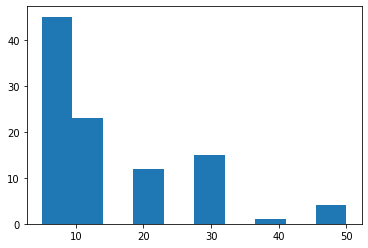

In [0]:
# plt.hist(top)

# Cosine similarity (Doc2Vec)

In [0]:
from sklearn.metrics.pairwise import cosine_similarity as cosine

def cosine_d2v(anne_vectors):
  cosine_similarities = np.zeros((len(anne_vectors), len(anne_vectors)))
  for i in range(len(anne_vectors)):
    for e in range(len(anne_vectors)):
      cosine_similarities[i][e] = float(cosine(anne_vectors[i].reshape(1, -1), anne_vectors[e].reshape(1, -1)))

  d = pd.DataFrame(cosine_similarities, columns = ["Book {}".format(i) for i in range(1, 9)], index = ["Book {}".format(i) for i in range(1, 9)])
  return d

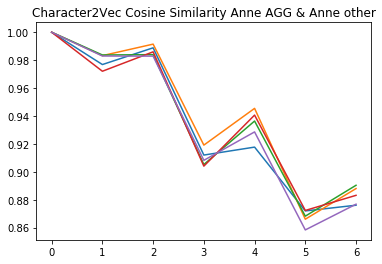

In [236]:
for i in range(5):
  anne_vectors, characters_as_vectors = train_doc2vec()
  d = cosine_d2v(anne_vectors)
  plt.plot(range(7), list(d.iloc[0][:-2]) + [np.mean(d.iloc[0, -2:])])
  plt.title("Character2Vec Cosine Similarity Anne AGG & Anne other")
plt.show()

# Cosine similarity Latent Dirichlet Allocation

In [0]:
def cosine_lda(anne_vectors_lda):
  anne_vectors_lda = [np.array(i) for i in anne_vectors_lda]
  from sklearn.metrics.pairwise import cosine_similarity as cosine
  cosine_similarities = np.zeros((len(anne_vectors_lda), len(anne_vectors_lda)))
  for i in range(len(anne_vectors_lda)):
    for e in range(len(anne_vectors_lda)):
      try:
         cosine_similarities[i][e] = float(cosine(anne_vectors_lda[i].reshape(1, -1), anne_vectors_lda[e].reshape(1, -1)))
      except:
        print(i, e)
  d = pd.DataFrame(cosine_similarities, columns = ["Book {}".format(i) for i in range(1, 9)], index = ["Book {}".format(i) for i in range(1, 9)])
  return d
d = cosine_lda(anne_vectors_lda)

In [238]:
d

,Book 1,Book 2,Book 3,Book 4,Book 5,Book 6,Book 7,Book 8
Book 1,1.000000,0.997059,0.998777,0.997348,0.996644,0.997196,0.991713,0.996527
Book 2,0.997059,1.000000,0.998650,0.999905,0.999934,0.999932,0.986006,0.989330
Book 3,0.998777,0.998650,1.000000,0.998386,0.998133,0.998525,0.985446,0.994411
Book 4,0.997348,0.999905,0.998386,1.000000,0.999942,0.999949,0.988043,0.989333
Book 5,0.996644,0.999934,0.998133,0.999942,1.000000,0.999961,0.986588,0.988063
Book 6,0.997196,0.999932,0.998525,0.999949,0.999961,1.000000,0.987083,0.988924
Book 7,0.991713,0.986006,0.985446,0.988043,0.986588,0.987083,1.000000,0.985286
Book 8,0.996527,0.989330,0.994411,0.989333,0.988063,0.988924,0.985286,1.000000


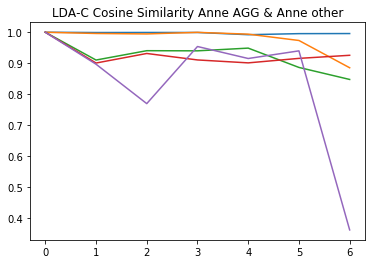

In [239]:
for i in range(5):
  anne_vectors_lda, characters_as_vectors_lda = train_lda(num_topics = 5)
  d = cosine_lda(anne_vectors_lda)
  plt.plot(range(8), list(d.iloc[0][:-2]) + [np.mean(d.iloc[0, -2:])])
  plt.title("LDA-C Cosine Similarity Anne AGG & Anne other")
plt.show()

In [0]:
#Evaluating Doc2Vec 
#reading human-annotated character relation annotations
char_rel_frame = pd.read_csv(direc+"character_relation_annotations.txt", sep = "\t")
char_rel_frame = char_rel_frame[char_rel_frame["title"]=="Anne of Green Gables"]
char_rel_frame  = char_rel_frame[char_rel_frame["annotator"]=="annotator_11"]

In [0]:
#d2v & lda evaluation

def evaluate(model='d2v'):
  coarse = char_rel_frame["coarse_category"].unique()
  affinity = char_rel_frame["affinity"].unique()
  fine = char_rel_frame["fine_category"].unique()
  change = char_rel_frame["change"].unique()

  criteria = [coarse, affinity, fine, change]
  col = ["coarse_category", "affinity", "fine_category", "change"]

  for n in range(len(criteria)):
    for c in criteria[n]:
      print(c)
      for i in range(len(char_rel_frame[char_rel_frame[col[n]]==c])):
        samples = []
        false_samples = []
        for k in range(100): #100 samples
          if model=='d2v':
            anne_vectors, characters_as_vectors = train_doc2vec()
            random_anne_vectors, random_characters_as_vectors = train_doc2vec(randomise=True)
          elif model=='lda':
            anne_vectors, characters_as_vectors = train_lda()
            random_anne_vectors, random_characters_as_vectors = train_lda(randomise=True)
          c1 = find_vector_for_character(characters_as_vectors, [char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_1"], char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_1"].split()[0]], 0)
          c2 = find_vector_for_character(characters_as_vectors, [char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_2"], char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_2"].split()[0]], 0)
          random_c1 = find_vector_for_character(random_characters_as_vectors, [char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_1"], char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_1"].split()[0]], 0)
          random_c2 = find_vector_for_character(random_characters_as_vectors, [char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_2"], char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_2"].split()[0]], 0)
          samples.append(cosine(c1, c2))
          false_samples.append(cosine(random_c1, random_c2))
        p, mean = ttest_ind(samples, false_samples), np.mean(samples)
        if model=='lda':
          if c1.shape==(1, 5) and c2.shape==(1, 5):
            print(char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_1"], char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_2"], p, mean)
        elif model=='d2v':
          if c1.shape==(1, 300) and c2.shape==(1, 300):
            print(char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_1"], char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_2"], p, mean)


In [0]:
# evaluate()

In [0]:
# evaluate(model='lda')

In [0]:
# find_vector_for_character(characters_as_vectors_lda, ['Anne Shirley', 'Anne'])

In [0]:
# #using a frequentist approach to show that each character is statistically 
# #different from the "mean"

# true_samps_d2v = []
# shuff_samps_d2v = []
# true_samps_lda = []
# shuff_samps_lda = []

# n = 5
# for i in range(n):
#   anne_vectors, characters_as_vectors = train_doc2vec()
#   anne_vectors_lda, characters_as_vectors_lda = train_lda()
#   anne_vectors_samp, characters_as_vectors_samp = train_doc2vec(randomise=True)
#   anne_vectors_lda_samp, characters_as_vectors_lda_samp = train_lda(randomise=True)
#   true_samps_d2v.append(cosine_d2v(anne_vectors))
#   shuff_samps_d2v.append(cosine_d2v(anne_vectors_samp))
#   true_samps_lda.append(cosine_lda(anne_vectors_lda))
#   shuff_samps_lda.append(cosine_lda(anne_vectors_lda_samp))

In [0]:
# true_samps_d2v[0]

In [0]:
# from scipy.stats import ttest_ind
# samples_true = np.zeros(shape=(n, len(np.array(true_samps_d2v[0]).flatten())))
# samples_shuff = np.zeros(shape=(n, len(np.array(true_samps_d2v[0]).flatten())))
# for i in range(len(true_samps_d2v)):
#   t = np.array(true_samps_d2v[i]).flatten()
#   f = np.array(shuff_samps_d2v[i]).flatten()
#   for e in range(len(t)):
#     samples_true[i][e] = t[e]
#     samples_shuff[i][e] = f[e]

# p_vals = []
# for k in range(len(np.array(true_samps_d2v[0]).flatten())):
#   p_vals.append(ttest_ind(samples_true[:,k], samples_shuff[:,k])[1])



In [0]:
# plt.hist(p_vals, bins=81)

In [0]:
# from scipy.stats import ttest_ind

# true_samps_d2v_flat = np.array(true_samps_d2v).flatten()
# shuff_samps_d2v = np.array(true_samps_d2v).flatten()
# true_samps_lda = []
# shuff_samps_lda = []

In [0]:
#conducting experiments based on hypotheses stated in paper
#testing hypothesis 1
from scipy.stats import ttest_ind
def test_hyp(c1_names, c2_names, model_name, book, n = 50, lemmatize = False):
  #using a frequentist approach to show that each character is statistically 
  #different from the "mean"
  true_samps = []
  shuff_samps = []
  for i in range(n):
    anne_vectors, characters_as_vectors = model_name(lemmatize = lemmatize)
    anne_vectors_samp, characters_as_vectors_samp = model_name(randomise=True, lemmatize = lemmatize)
    c1 = np.array(find_vector_for_character(characters_as_vectors, c1_names, book=book))
    c2 = np.array(find_vector_for_character(characters_as_vectors, c2_names, book=book))
    c1_samp = np.array(find_vector_for_character(characters_as_vectors_samp, c1_names, book=book))
    c2_samp = np.array(find_vector_for_character(characters_as_vectors_samp, c2_names, book=book))
    true_samps.append(cosine(c1, c2))
    shuff_samps.append(cosine(c1_samp, c2_samp))
  # samples_true = np.zeros(shape=(n, len(np.array(true_samps[0]).flatten())))
  # samples_shuff = np.zeros(shape=(n, len(np.array(shuff_samps[0]).flatten())))
  # for i in range(len(true_samps_d2v)):
  #   t = np.array(true_samps_d2v[i]).flatten()
  #   f = np.array(shuff_samps_d2v[i]).flatten()
  #   for e in range(len(t)):
  #     samples_true[i][e] = t[e]
  #     samples_shuff[i][e] = f[e]

  return ttest_ind(true_samps, shuff_samps), np.mean(true_samps)




In [0]:
#hyp2 lda #lem false
print("lda0")
print(test_hyp(anne_names, diana_names, train_lda, 0))
print("lda4")
print(test_hyp(anne_names, cornelia_names, train_lda, 4))

#hyp2 character2vec #lem false
print("c2v0")
print(test_hyp(anne_names, diana_names, train_doc2vec, 0))
print("c2v4")
print(test_hyp(anne_names, cornelia_names, train_doc2vec, 4))

lda0
(Ttest_indResult(statistic=array([[11.340325]], dtype=float32), pvalue=array([[1.53829271e-19]])), 0.9212396)
lda4
(Ttest_indResult(statistic=array([[6.7589073]], dtype=float32), pvalue=array([[1.00556974e-09]])), 0.8676873)
c2v0
(Ttest_indResult(statistic=array([[-5.5780225]], dtype=float32), pvalue=array([[2.15674076e-07]])), 0.9199376)
c2v4


In [0]:
# test_hyp(anne_names, cornelia_names, train_lda, book = 4)

In [260]:
cosine(np.array(find_vector_for_character(characters_as_vectors, anne_names, 4)), np.array(find_vector_for_character(characters_as_vectors, cornelia_names, 4)))

array([[0.97301435]], dtype=float32)

In [0]:
# #hyp2 lda #lem tru
# print("lda0")
# print(test_hyp("Anne Shirley", "Diana Barry", train_lda, 0, lemmatize = True))
# print("lda4")
# print(test_hyp("Anne Shirley", "Cornelia Bryant", train_lda, 4, lemmatize = True))

# #hyp2 character2vec #lem tru
# print("c2v0")
# print(test_hyp("Anne Shirley", "Diana Barry", train_doc2vec, 0, lemmatize = True))
# print("c2v4")
# print(test_hyp("Anne Shirley", "Cornelia Bryant", train_doc2vec, 4, lemmatize = True))

In [0]:
# #hyp1 lda #lem false
print("lda1")
print(test_hyp("Anne Shirley", "Davy Keith", train_lda, 1))
print("lda5")
print(test_hyp("Anne Shirley", "Jem Blythe", train_lda, 5))
print("lda6")
print(test_hyp("Anne Shirley", "Jem Blythe", train_lda, 6))

#hyp1 character2vec #lem false
print("c2v1")
print(test_hyp("Anne Shirley", "Davy Keith", train_doc2vec, 1))
print("c2v5")
print(test_hyp("Anne Shirley", "Jem Blythe", train_doc2vec, 5))
print("c2v6")
print(test_hyp("Anne Shirley", "Jem Blythe", train_doc2vec, 6))

In [0]:
# #hyp1 lda #lem t
print("lda1")
print(test_hyp("Anne Shirley", "Davy Keith", train_lda, 1, lemmatize = True))
print("lda5")
print(test_hyp("Anne Shirley", "Jem Blythe", train_lda, 5, lemmatize = True))
print("lda6")
print(test_hyp("Anne Shirley", "Jem Blythe", train_lda, 6, lemmatize = True))

#hyp1 character2vec #lem t
print("c2v1")
print(test_hyp("Anne Shirley", "Davy Keith", train_doc2vec, 1, lemmatize = True))
print("c2v5")
print(test_hyp("Anne Shirley", "Jem Blythe", train_doc2vec, 5, lemmatize = True))
print("c2v6")
print(test_hyp("Anne Shirley", "Jem Blythe", train_doc2vec, 6, lemmatize = True))

lda1
(Ttest_indResult(statistic=array([[14.632239]], dtype=float32), pvalue=array([[2.1607687e-26]])), 0.8878376)
lda5
(Ttest_indResult(statistic=array([[14.46903]], dtype=float32), pvalue=array([[4.59665071e-26]])), 0.7563882)
lda6
(Ttest_indResult(statistic=array([[2.833201]], dtype=float32), pvalue=array([[0.00559539]])), 0.46379074)
c2v1
(Ttest_indResult(statistic=array([[0.92037296]], dtype=float32), pvalue=array([[0.35963793]])), 0.9822154)
c2v5
(Ttest_indResult(statistic=array([[2.913276]], dtype=float32), pvalue=array([[0.00443029]])), 0.99563384)
c2v6
(Ttest_indResult(statistic=array([[-0.29202995]], dtype=float32), pvalue=array([[0.77088104]])), 0.99928737)
